In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Introduction

We're all foodies, so we decided to rank neighborhoods on how good it is to live there as a foodie. To solve the problem we looked at both cooking and eating out. Two datasets contained data about the food available in a neighborhood including restaurants and places to buy ingredients. The third dataset contains information about the sidewalks throughout Pittsburgh to determine how accessible food is. While deciding how to factor in our metric we considered, multiple metrics for transportation and food availability. For example, we considered including public transportation accessibility, but there were no datasets that provided a good representation of this metric.  

# Methodology

To quantitatively order neighborhoods by how plentiful ingredients are, we ranked them by the amount of both grocery and convenience stores within their boundaries. We have a CSV from the city with each store in the city's category (grocery or convenience), latitude, and longitude. We converted it to a Pandas Dataframe, for ease of use. To neatly translate each store's coordinates to its neighborhood, we used a handy code snippet from our lovely TA Griffin to append another column to the Dataframe with each store's neighborhood. We made two dictionaries, one with neighborhoods vs. grocery stores, and the other with neighborhoods vs. convenience stores, and visualized them with matplotlib, for our analysis and your consideration. 

For walkability, the dataset already included neighborhood labels so after uploading the data and formatting it as a pandas df, the analysis methods were straightforward. 

To figure out what area had the most food facilities, we took the dataset and created a dictionary that incremented the area's value for each food facility. Once we had a dictionary full of all the area's facility counts, we used a simple sorting script to determine what the top 20 areas were and what their facility counts were

# What is the Best Neighborhood?

## Ingredient availability

Bloomfield is the best neighborhood for ingredient availability. 

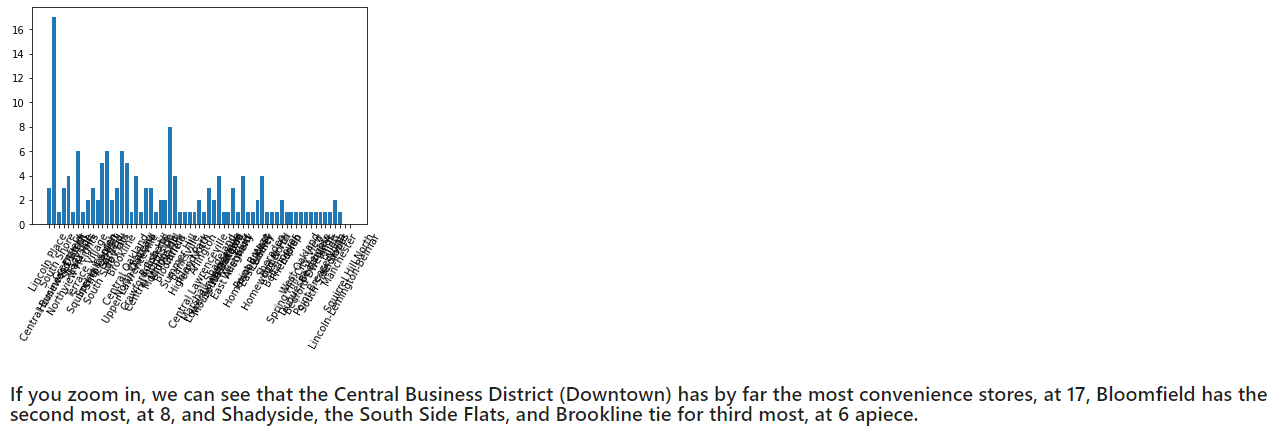

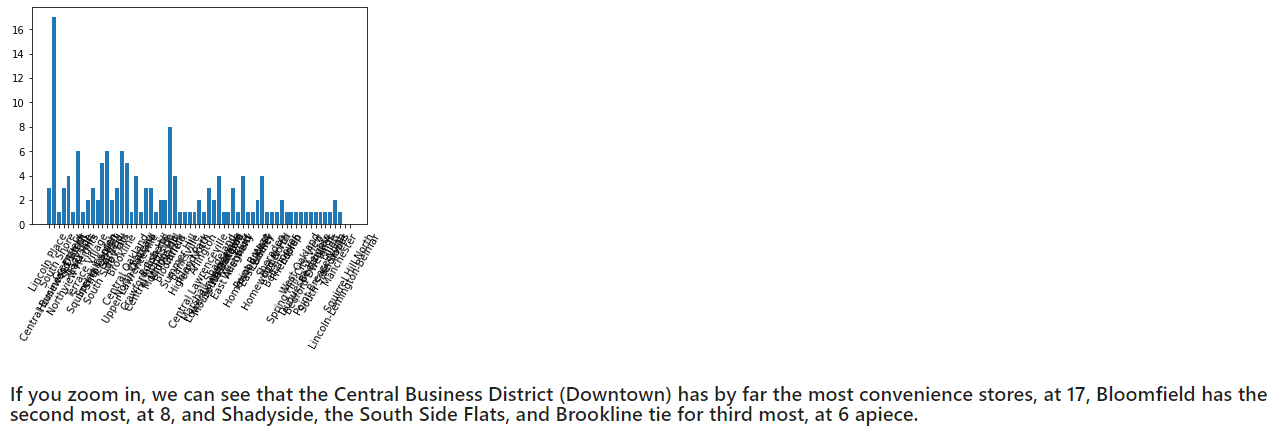

For the code, refer to the notebook called "Ingredients.ipynb"

We have (1) a CSV from the city with each store's category (grocery or convenience), latitude, and longitude. We convert it to a Pandas Dataframe, for ease of use. Also, we have some awesome code snippets from our lovely TA Griffin to neatly translate each store's coordinates to its neighborhood. We append another column to the Dataframe with each store's neighborhood, and then make a dictionary with dictionary comprehension with each neighborhood as a key and its amount of grocery stores as a value. We do the same with neighborhoods' convenience stores.

## Walkability

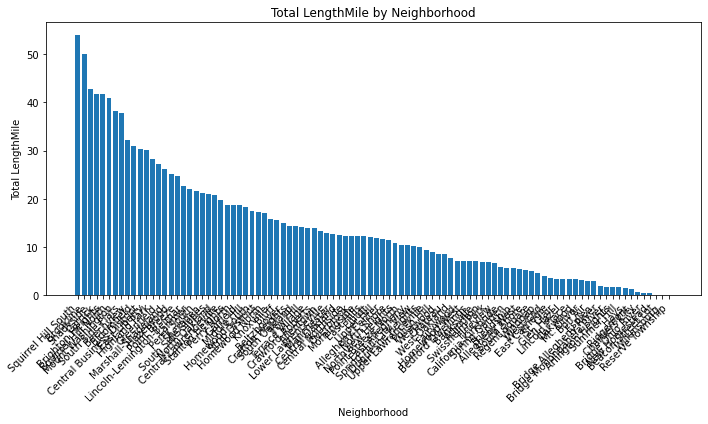

In [8]:
sw = pd.read_csv("SidewalkStepsBlockgroup.csv")
df = sw[sw['Municipali'] == 'Pittsburgh']
result = (df.groupby('Neighborho')['LengthMile'].sum().reset_index())
result = result.sort_values(by='LengthMile', ascending=False)
plt.figure(figsize=(10, 6))
result.dropna()
plt.bar(result['Neighborho'], result['LengthMile'])
plt.xlabel('Neighborhood')
plt.ylabel('Total LengthMile')
plt.title('Total LengthMile by Neighborhood')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

The data for this metric comes from a dataset containing the number and length of all the sidewalks in Pittsburgh. The graph above shows an overview of the total sidewalk length by neighborhood. The graph below will zoom in on the top ten as well as some honorable mentions.

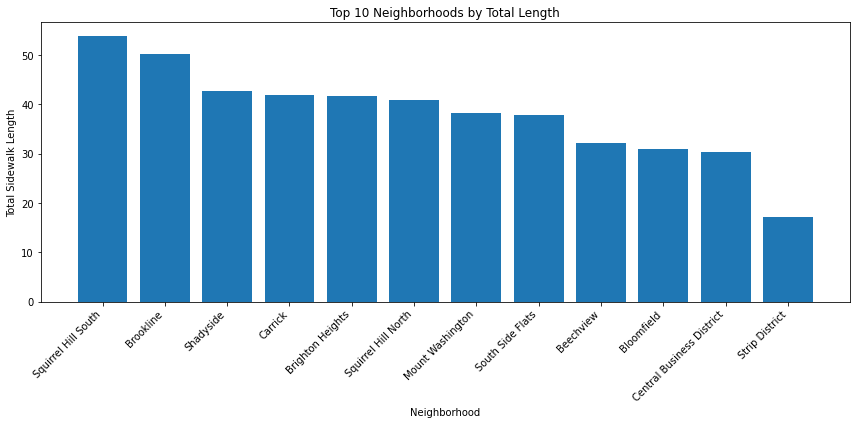

In [11]:
result_sorted = result.sort_values(by='LengthMile', ascending=False)
top_ten = result_sorted.head(10)
df0 = result[result['Neighborho'].isin(['Bloomfield', 'Central Business District', 'Strip District'])]
best = pd.concat([top_ten, df0], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.bar(best['Neighborho'], best['LengthMile'])
plt.xlabel('Neighborhood')
plt.ylabel('Total Sidewalk Length')
plt.title('Top 10 Neighborhoods by Total Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This chart looks at the top ten, as well at downton and the Strip. Based on the metric of walkability, Squirrel Hill South is the best neighborhood to eat in because it will be the easist place to walk to food.

## Places to Eat

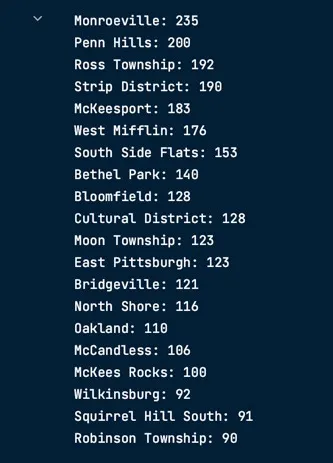

The data for this metric comes form a dataset that has all the food facilities in allegheny county. The picture shows the top ten areas with the most food facilities present. Based on this list Monreoville is the best area with 235 facilities. 

## The Best Neighborhood Is...

The data-driven conclusion from all three of our groups' data analyses is that the best neighborhood in the city limits to be a foodie in is Bloomfield. It is the 3rd best for restaurants (after the Strip and Southside), the best for ingredients (by considering both grocery and convenience stores), and it's up there for walkability, too.

# Conclusion

Julie Lawler: My personal favorite neighborhood to eat in is probably Squirrel hill or Shadyside because there are a lot of restaurants and groceries stores in both neighborhoods. Both scored high in terms of walkability but lower in ingredients and availability. This is not surprising to me because both neighborhoods have large residential areas so this would lower the amount of restaurants. I think the Strip district seems like a very logical, data-driven best neighborhood. It is relatively small and therefore walkable and has a lot of restaurants and places to buy ingredients.

Brian Simon: My dataset concluded that monroeville is the best area due to the highest amount of food facilities, but I personally believe the strip district is the best.I like the low prices, and large amount of selections. I like the diversity of the options, and its aesthetic. I personally have not been to monroeville, but I have gone to strip district before. Although I have not eaten out often, when I have it has been good at the strip district

In my (Christian's) opinion, the best neighborhood for foodies is Squirrel Hill South. Brian's data points to the Strip District (within city limits-- I'm not moving to Monroeville), Julie's says Squirrel Hill South, and mine says Bloomfield. However, our metrics don't rank neighborhoods on food per unit unit area (that would defeat the purpose of ranking walkability) and Bloomfield is a gigantic neighborhood in terms of area and topography (getting from Centre to Penn, by Childrens is hard), biasing data in favor of it, compared to the centralized part of Squirrel Hill South bounded by Forbes, the 376 ramp, and Schenley and Frick Parks. Anecdotally, my two best friends actually live in Bloomfield and Squirrel Hill, because I'm old as dirt; Squirrel Hill is much easier to walk around to both stores and restaurants compared to Bloomfield. Lastly, this isn't about food and I'm not sure this is useful info because it looks like Mario's, Phat's, and Panther Pit are gonna be the most popular bars in the class (for everyone who's 21, of course) but Bloomfield has better bars than Squirrel Hill in my opinion and the best in the city after Southside.